## Task 1: Load and Inspect the Data (15-20 minutes)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [55]:

df = pd.read_csv("heart.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [6]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


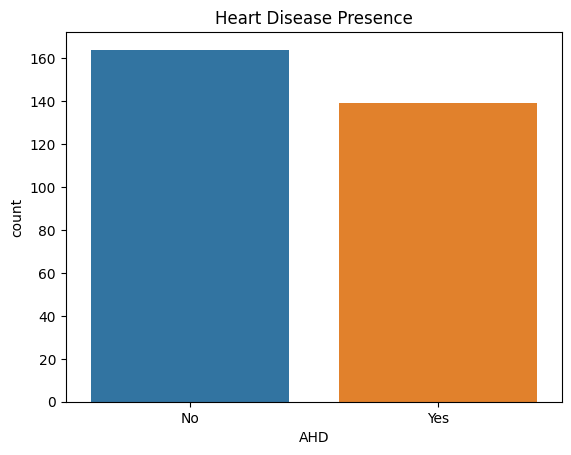

In [9]:
sns.countplot(x='AHD', data=df)
plt.title('AHD Yes or No')
plt.show()

## Task 2: Data Cleaning and Preprocessing (25-30 minutes)

#### Handle Missing Data: 


In [10]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

### Feature Engineering: 


In [14]:
df['Sex'] = df['Sex'].map({1: 'Male', 0: 'Female'})  
df['Sex']

0        Male
1        Male
2        Male
3        Male
4      Female
        ...  
298      Male
299      Male
300      Male
301    Female
302      Male
Name: Sex, Length: 303, dtype: object

### Normalize or standardize numerical columns if necessary (e.g., RestingBP, Cholesterol, MaxHR). 


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Male: 1, Female: 0
df['ChestPain'] = label_encoder.fit_transform(df['ChestPain'])
df['RestBP'] = label_encoder.fit_transform(df['RestBP'])


### Create New Features

In [15]:
df['ExerciseStress'] = df['Oldpeak'] * df['Slope']
print(df[['Oldpeak', 'Slope', 'ExerciseStress']].head())

   Oldpeak  Slope  ExerciseStress
0      2.3      3             6.9
1      1.5      2             3.0
2      2.6      2             5.2
3      3.5      3            10.5
4      1.4      1             1.4


## Task 3: Exploratory Data Analysis (EDA)

### Univariate Analysis

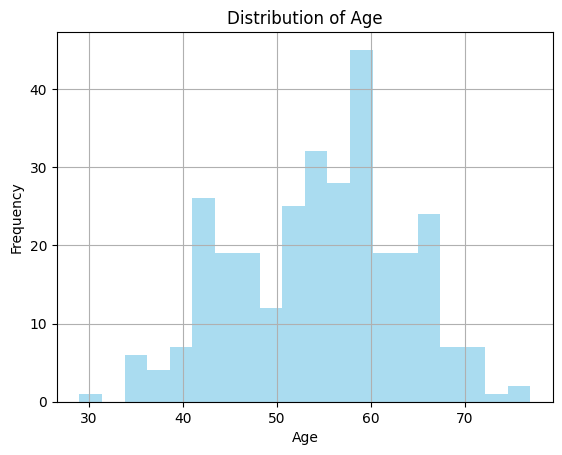

In [16]:
df['Age'].hist(bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

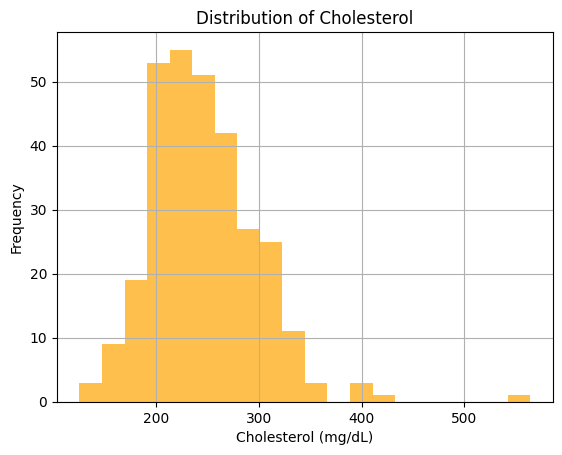

In [19]:
df['Chol'].hist(bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()

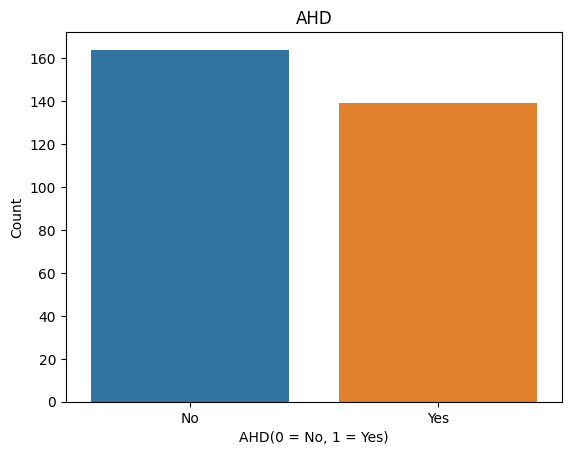

In [20]:
sns.countplot(x='AHD', data=df)
plt.title('AHD')
plt.xlabel('AHD(0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


### Bivariate Analysis: 

#### use a count plot or bar plot for categorical features like Sex, ChestPainType, FBS, ExerciseAngina. 

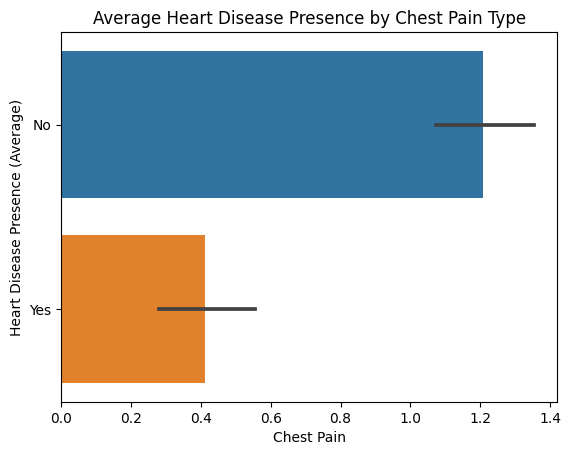

In [22]:
sns.barplot(x='ChestPain', y='AHD', data=df)
plt.title('Average Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain')
plt.ylabel('Heart Disease Presence (Average)')
plt.show()


####  Use a boxplot or violin plot for numerical features like Age, Cholesterol, MaxHR to see how they relate to heart disease presence. 


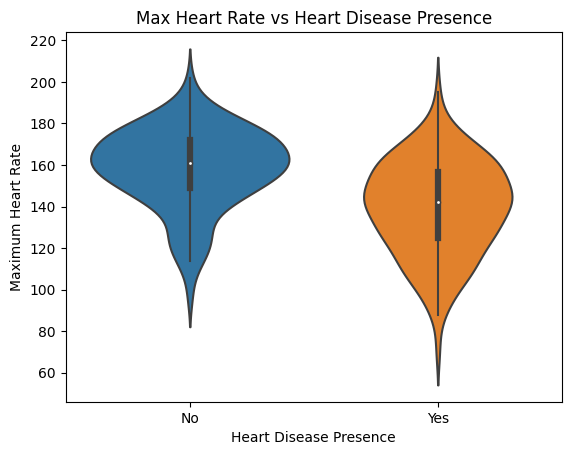

In [24]:
sns.violinplot(x='AHD', y='MaxHR', data=df)
plt.title('Max Heart Rate vs Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Maximum Heart Rate')
plt.show()

####  Correlation matrix to explore relationships between numeric features. 

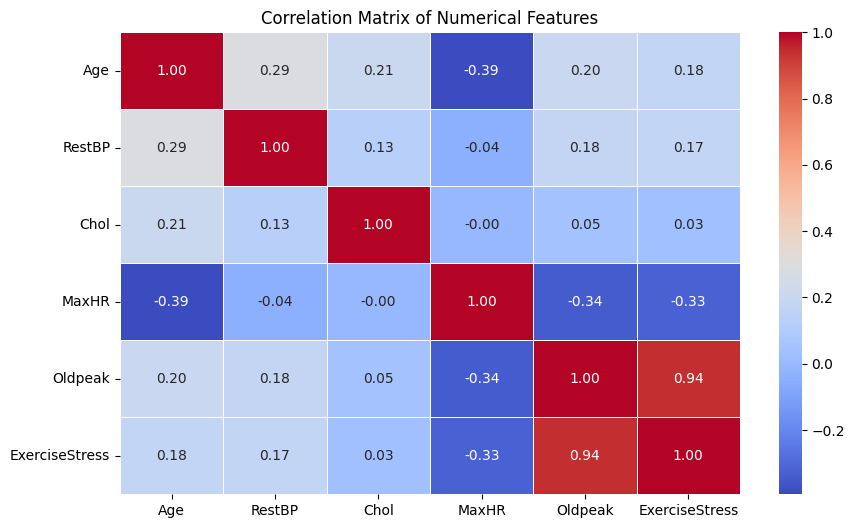

In [26]:
correlation_matrix = df[['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak', 'ExerciseStress']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Visualizing correlations: 


#### Visualize correlations using a heatmap (sns.heatmap), focusing on relationships between features like cholesterol, age, and resting blood pressure.

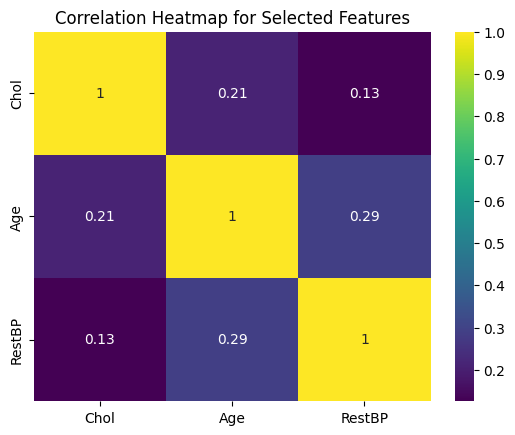

In [28]:
selected_features = df[['Chol', 'Age', 'RestBP']]

sns.heatmap(selected_features.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap for Selected Features')
plt.show()


## Task 4: Aggregation and Insights 

###  Use groupby to find the survival rate (presence of heart disease) by diƯerent categories:

#### Survival by gender (Male vs Female). 


In [46]:
survival_by_gender = df.groupby('Sex')['AHD'].value_counts(normalize=True).unstack().apply(lambda x: x * 100, axis=1)
survival_by_gender = survival_by_gender.rename(columns={'No': 'No Heart Disease (%)', 'Yes': 'Heart Disease (%)'})
print("Survival by Gender:")
print(survival_by_gender)

Survival by Gender:
AHD  No Heart Disease (%)  Heart Disease (%)
Sex                                         
0               74.226804          25.773196
1               44.660194          55.339806


#### Survival by chest pain type (ChestPainType). 

In [47]:
survival_by_chest = df.groupby('ChestPain')['AHD'].value_counts(normalize=True).unstack().apply(lambda x: x * 100, axis=1)
survival_by_chest = survival_by_chest.rename(columns={'No': 'No Heart Disease (%)', 'Yes': 'Heart Disease (%)'})

print("\nSurvival by Chest Pain Type:")
print(survival_by_chest)


Survival by Chest Pain Type:
AHD           No Heart Disease (%)  Heart Disease (%)
ChestPain                                            
asymptomatic             27.083333          72.916667
nonanginal               79.069767          20.930233
nontypical               82.000000          18.000000
typical                  69.565217          30.434783


#### Survival by Maximum Heart Rate Achieved (MaxHR)

In [58]:
df['AHD'] = df['AHD'].map({'Yes': 1, 'No': 0})

bins = [0, 120, 150, 200]  
labels = ['Low', 'Medium', 'High']
df['MaxHR_Binned'] = pd.cut(df['MaxHR'], bins=bins, labels=labels)

max_hr_survival = df.groupby('MaxHR_Binned')['AHD'].mean()
print(max_hr_survival)

MaxHR_Binned
Low       0.810811
Medium    0.627451
High      0.276074
Name: AHD, dtype: float64


####  Calculate average cholesterol levels for people with and without heart disease, and compare these across categories (e.g., ChestPainType). 


In [38]:
cholesterol_avg = df.groupby('AHD')['Chol'].mean()
print(cholesterol_avg)

AHD
0    242.640244
1    251.474820
Name: Chol, dtype: float64


In [39]:
cholesterol_by_cp = df.groupby(['ChestPain', 'AHD'])['Chol'].mean()
print(cholesterol_by_cp)

ChestPain  AHD
0          0      245.333333
           1      252.438095
1          0      245.279412
           1      239.000000
2          0      240.682927
           1      263.444444
3          0      229.875000
           1      253.714286
Name: Chol, dtype: float64


## Task 5: Derive Medical Insights 

###  Investigate the data set and come up with at least 5 diƯerent insights with proof

ChestPain
asymptomatic    0.729167
nonanginal      0.209302
nontypical      0.180000
typical         0.304348
Name: AHD, dtype: float64


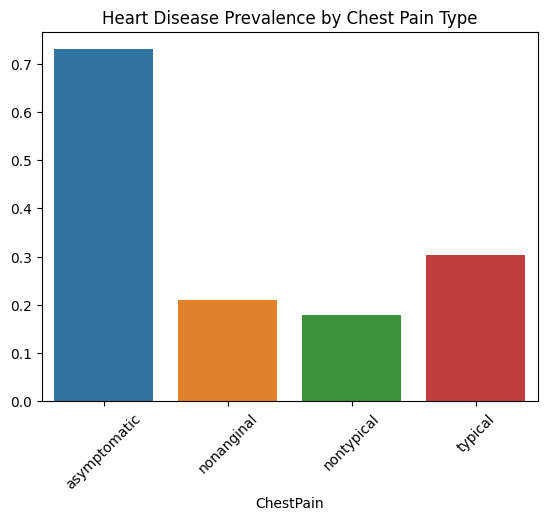

In [59]:
chest_pain_survival = df.groupby('ChestPain')['AHD'].mean()
print(chest_pain_survival)
sns.barplot(x=chest_pain_survival.index, y=chest_pain_survival.values)
plt.title('Heart Disease Prevalence by Chest Pain Type')
plt.xticks(rotation=45)
plt.show()

AHD
0    242.640244
1    251.474820
Name: Chol, dtype: float64


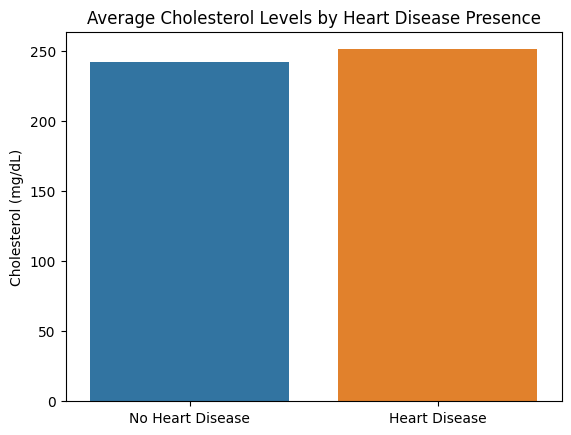

In [60]:
cholesterol_avg = df.groupby('AHD')['Chol'].mean()
print(cholesterol_avg)
sns.barplot(x=['No Heart Disease', 'Heart Disease'], y=cholesterol_avg.values)
plt.title('Average Cholesterol Levels by Heart Disease Presence')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

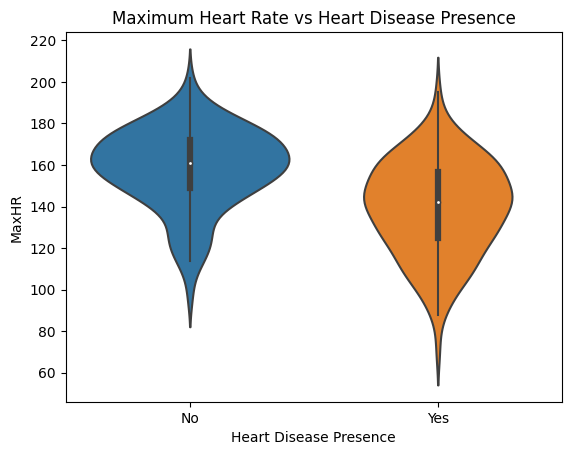

In [61]:
sns.violinplot(x='AHD', y='MaxHR', data=df)
plt.title('Maximum Heart Rate vs Heart Disease Presence')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Heart Disease Presence')
plt.show()

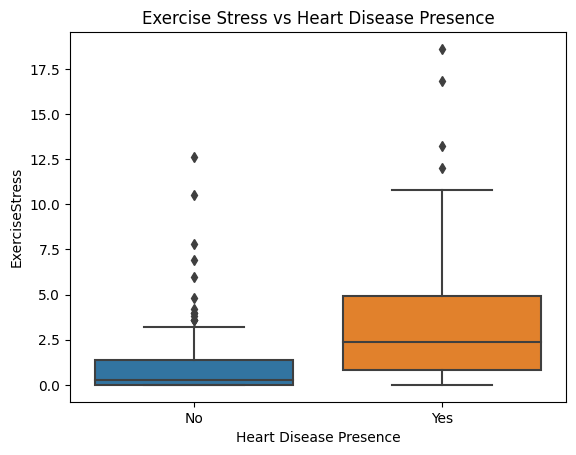

In [62]:
df['ExerciseStress'] = df['Oldpeak'] * df['Slope']
sns.boxplot(x='AHD', y='ExerciseStress', data=df)
plt.title('Exercise Stress vs Heart Disease Presence')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Heart Disease Presence')
plt.show()


AHD
0    129.250000
1    134.568345
Name: RestBP, dtype: float64


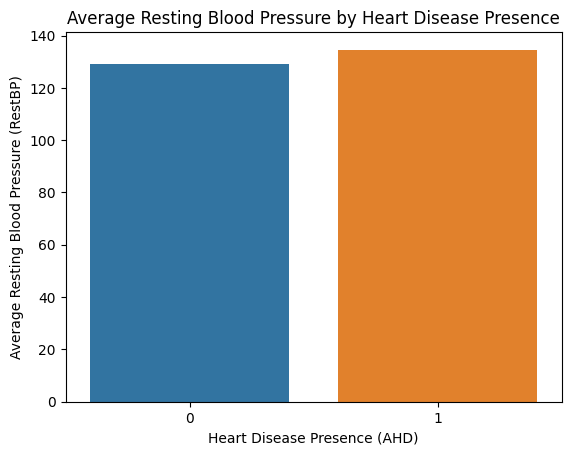

In [65]:
Rest_Bp = df.groupby('AHD')['RestBP'].mean()
print(Rest_Bp)
sns.barplot(x=Rest_Bp.index, y=Rest_Bp.values)
plt.title('Average Resting Blood Pressure by Heart Disease Presence')
plt.xlabel('Heart Disease Presence (AHD)')
plt.ylabel('Average Resting Blood Pressure (RestBP)')
plt.show()